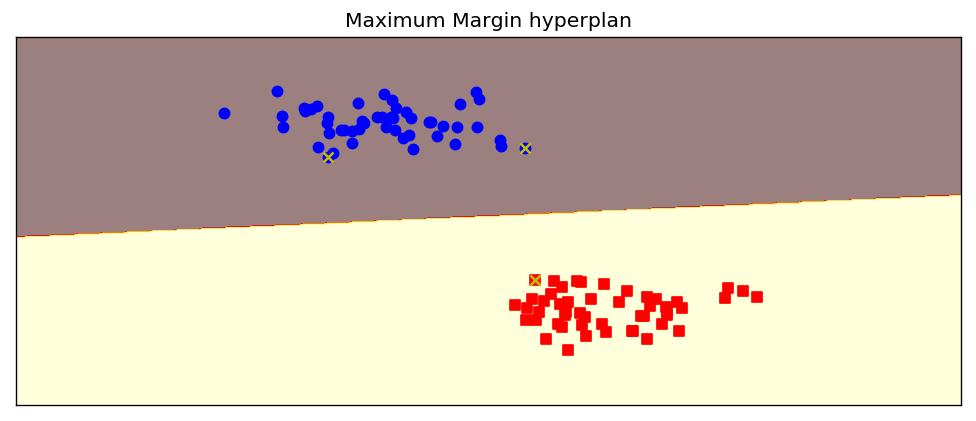

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np 
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')
X,y = make_blobs(n_samples = 100,centers =2,random_state = 0,cluster_std = 0.3)
clf = svm.SVC(C =1.0,kernel = 'linear')
clf.fit(X,y)

plt.figure(figsize=(10,4),dpi=122)
plot_hyperplane(clf,X,y,title = 'Maximum Margin hyperplan')

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

clf = svm.SVC(C=1.0,kernel='rbf',gamma= 0.0001)
clf.fit(X_train,y_train)
train_socre = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print (train_socre,test_score)   #gamma 值从 0.1 改到0.0001  cross validation的值大幅度上升

0.956043956044 0.90350877193


{'gamma': 0.00011379310344827585} 0.936731107206


/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


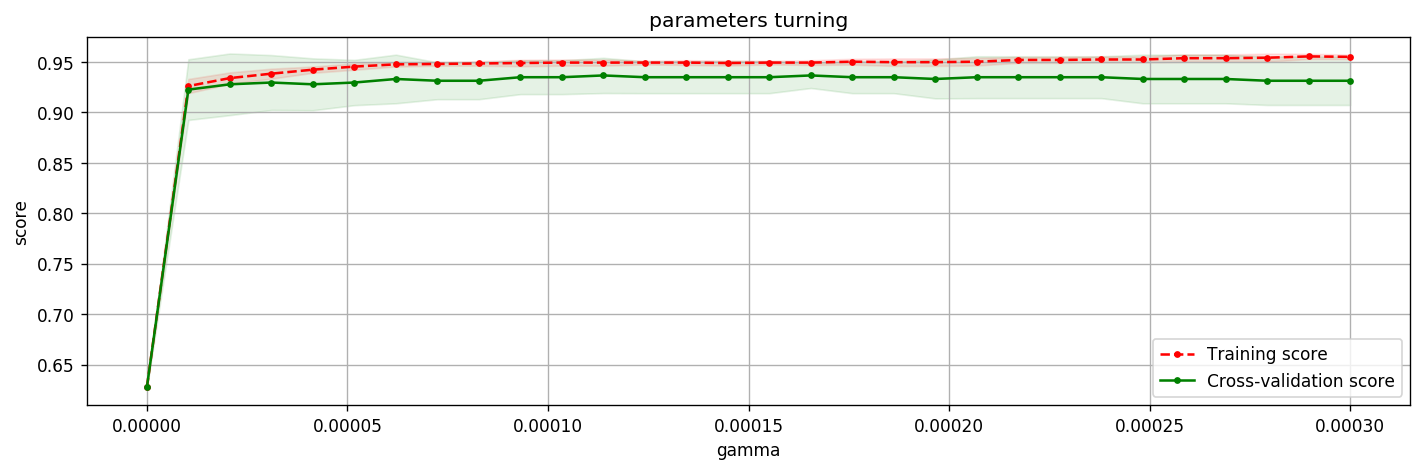

In [19]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0,0.0003,30)
param_grid = {'gamma':gammas}
clf = GridSearchCV(svm.SVC(),param_grid,cv = 5)
clf.fit(X,y)
print (clf.best_params_,clf.best_score_)
plt.figure(figsize=(14,4),dpi=122)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma');

elaspe: 0.654223


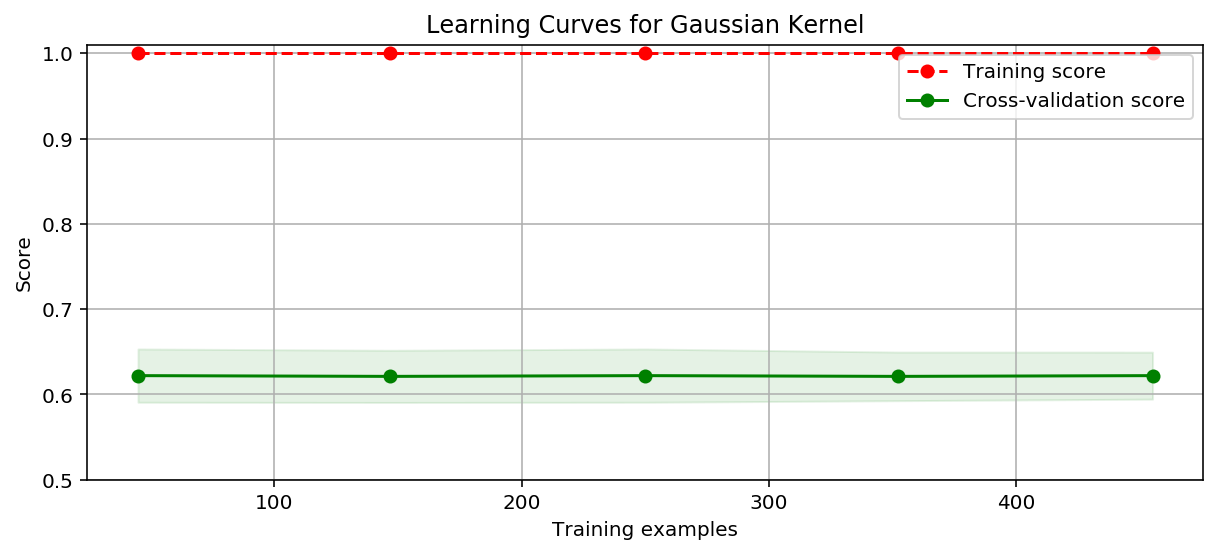

In [24]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, svm.SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))   #trainning 过拟合

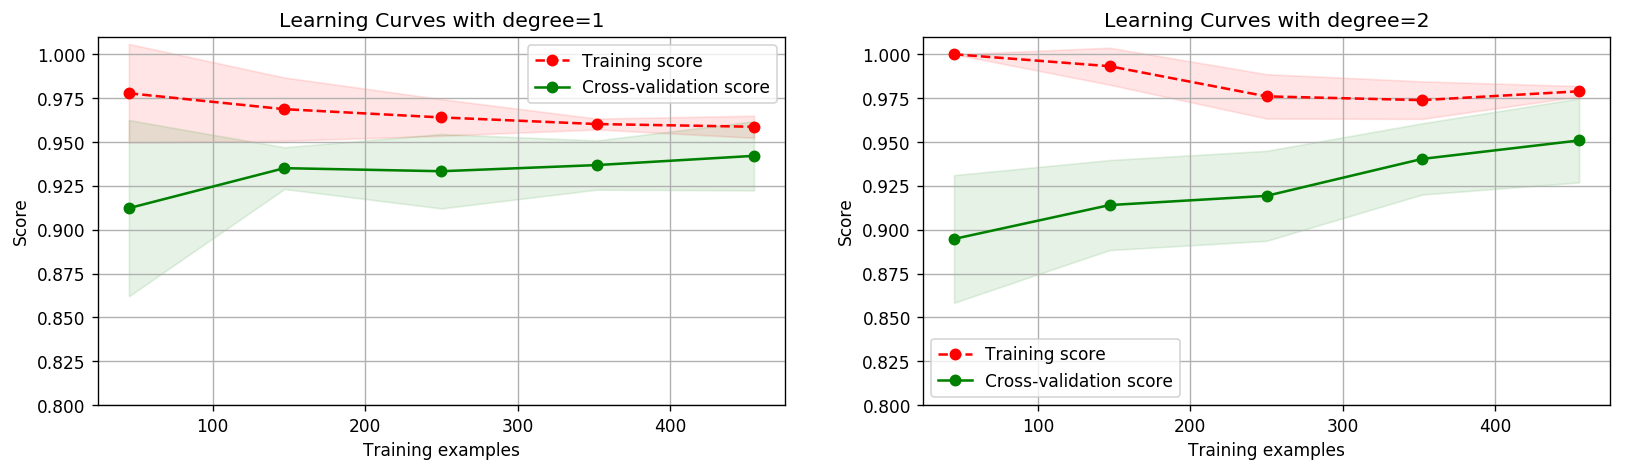

In [26]:
#接下来看下多项式核函数

cv = ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1,2]
plt.figure(figsize=(16,4),dpi = 122)
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(plt,svm.SVC(C=1.0,kernel ='poly',degree= degrees[i]),title.format(degrees[i]),X,y,ylim=(0.8,1.01),cv=cv,n_jobs = 4)
    